In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

"""
Horas de uso diario 2 1,5 1 0,5
Vida aproximada (meses) Litio 3,1 4,2 5,1 6,3
Vida aproximada (meses) Alcalina 1,3 1,6 1,8 2,2
"""

# Datos
df = pd.DataFrame({
    'Horas': [2, 1.5, 1, 0.5],
    'Vida Litio': [3.1, 4.2, 5.1, 6.3],
    'Vida Alcalina': [1.3, 1.6, 1.8, 2.2]
})

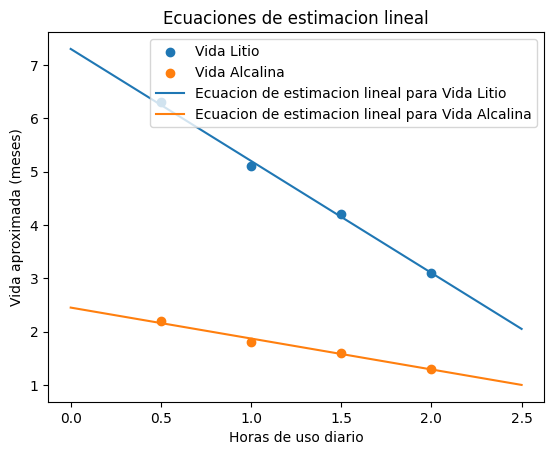

In [9]:
""""
(a) Desarrolle dos ecuaciones de estimaci´on lineales, una para pronosticar la vida del producto basada
en el uso diario con las bater´ıas de litio y otra para las bater´ıas alcalinas.
"""

# Regresion lineal
def regresion_lineal(x, y):
    # Calculo de la media
    b1 = np.sum((x - x.mean()) * (y - y.mean())) / np.sum((x - x.mean()) ** 2)

    # Calculo de la ordenada
    b0 = y.mean() - b1 * x.mean()

    return b0, b1

# Calculo de las ecuaciones de estimacion lineal
b0_litio, b1_litio = regresion_lineal(df['Horas'], df['Vida Litio'])
b0_alcalina, b1_alcalina = regresion_lineal(df['Horas'], df['Vida Alcalina'])

# Grafico de las ecuaciones de estimacion lineal
x = np.linspace(0, 2.5, 100)
y_litio = b0_litio + b1_litio * x
y_alcalina = b0_alcalina + b1_alcalina * x

# Grafico de las ecuaciones de estimacion lineal junto con sus puntos
# scatter plot of the data points
plt.scatter(df['Horas'], df['Vida Litio'], label='Vida Litio')
plt.scatter(df['Horas'], df['Vida Alcalina'], label='Vida Alcalina')

# plot the linear regression equations
plt.plot(x, y_litio, label='Ecuacion de estimacion lineal para Vida Litio')
plt.plot(x, y_alcalina, label='Ecuacion de estimacion lineal para Vida Alcalina')

# set the title and labels for the plot
plt.title('Ecuaciones de estimacion lineal')
plt.xlabel('Horas de uso diario')
plt.ylabel('Vida aproximada (meses)')

# show the legend
plt.legend()

# show the plot
plt.show()



In [7]:
""""
(b) ¿Cu´al de las dos estimaciones anteriores se ajusta mejor a los datos?
"""

# Calculo de los coeficientes de determinacion

def coeficiente_determinacion(x, y, b0, b1):
    sce = np.sum((y - b0 - b1 * x) ** 2)
    sct = np.sum((y - y.mean()) ** 2)

    r2 = 1 - (sce / sct)

    return r2

# Calculo de los coeficientes de determinacion
r2_litio = coeficiente_determinacion(df['Horas'], df['Vida Litio'], b0_litio, b1_litio)
r2_alcalina = coeficiente_determinacion(df['Horas'], df['Vida Alcalina'], b0_alcalina, b1_alcalina)

# Para saber cual de las dos estimaciones se ajusta mejor a los datos, se comparan los coeficientes de determinacion

print('Coeficiente de determinacion para Vida Litio: ', r2_litio)
print('Coeficiente de determinacion para Vida Alcalina: ', r2_alcalina)
if r2_litio > r2_alcalina:
    print('La estimacion lineal para Vida Litio se ajusta mejor a los datos')
else:
    print('La estimacion lineal para Vida Alcalina se ajusta mejor a los datos')


Coeficiente de determinacion para Vida Litio:  0.9972862957937585
Coeficiente de determinacion para Vida Alcalina:  0.9836257309941521
La estimacion lineal para Vida Litio se ajusta mejor a los datos
